Kaggle Dataset link : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

<h2><center><font color=blue>Importing The data

In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<center><h1><font face=roman color=red>Feature Engineering

We can see There are few features from which new ones can be derived :
        1)Total Sqaure Feet can be derived from Basement total area + 1st Floor total area + 2nd Floor total area
        2)We can concat quality of a feature and its condition in a new one
        3)

In [3]:
train['cond*qual'] = (train['OverallCond'] * train['OverallQual']) / 100.0
train['home_age_when_sold'] = train['YrSold'] - train['YearBuilt']
train['garage_age_when_sold'] = train['YrSold'] - train['GarageYrBlt']
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'] 

train['total_porch_area'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch'] 

<center><h1><font face=roman color=red>Data Preprocessing

<pre>Dropping Id column as it is just the indexing of the records and doesnt bring any value to the data

In [4]:
train.drop(['Id'], axis=1, inplace=True)
train.shape

(1460, 85)

<h2><center><font color=blue>Handling duplicate records

In [5]:
train.duplicated().sum()

0

<h2><center><font color=blue>Handling Missing/Null Records 

<pre>From 'data_description.txt' we know that there is no x(x represents the column name) in place of null and we will fill 
it with with in the ordinal columns and map with certain values in cardinal columns

Filling all categorical null wth 0 with NA will later map them according to their values

In [6]:
cat_cols = train.select_dtypes(include=object).columns
train[cat_cols] = train[cat_cols].fillna('NA')

<pre>Now only numerical cols have null which is also 0 so we will directly fill with 0

In [7]:
train.fillna(0, inplace=True)

<h2><center><font color=blue>Handling Constant Columns

In [8]:
constant_cols = []
for col in train.columns:
    if train[col].nunique() == 1:
        constant_cols.append(col)

print("Constant Columns:", constant_cols)

Constant Columns: []


<h2><center><font color=blue>Categoric to Numeric

<h3> Mapping Ordinal Features

In [9]:
ordinal_feat1 = ['GarageCond','GarageQual','FireplaceQu','KitchenQual','HeatingQC','BsmtCond','BsmtQual','PoolQC',
                 'ExterQual','ExterCond']
                          
for i in ordinal_feat1:
    train[i] = train[i].map({'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2, 'NA':1})
    
ordinal_feat2 = ['BsmtFinType1','BsmtFinType2']
for i in ordinal_feat2:
    train[i] = train[i].map({'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1})

train['Fence'] = train['Fence'].map({'GdPrv':5, 'MnPrv':4, 'GdWo':3, 'MnWw':2, 'NA':1 })
train['BsmtExposure'] = train['BsmtExposure'].map({'Gd':5,'Av':4,'Mn':3,'No':2,'NA':1})

all_ordinal = ordinal_feat1+ordinal_feat2+['BsmtExposure','Fence','OverallQual', 'OverallCond']

<h3>Mapping Cardinal Features

In [10]:
cardinal_data = train[train.select_dtypes(include=['object']).columns].copy()
cardinal_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,NA,WD,Normal
1456,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,NA,WD,Normal
1457,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,Shed,WD,Normal
1458,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,GasA,Y,FuseA,Typ,Attchd,Unf,Y,NA,WD,Normal


<center><h1><font face=roman color=red>EDA

<h3>1)Dropping Highly imbalanced Data </h3>
---as it reduces unecessary efforts to map the unrequired features

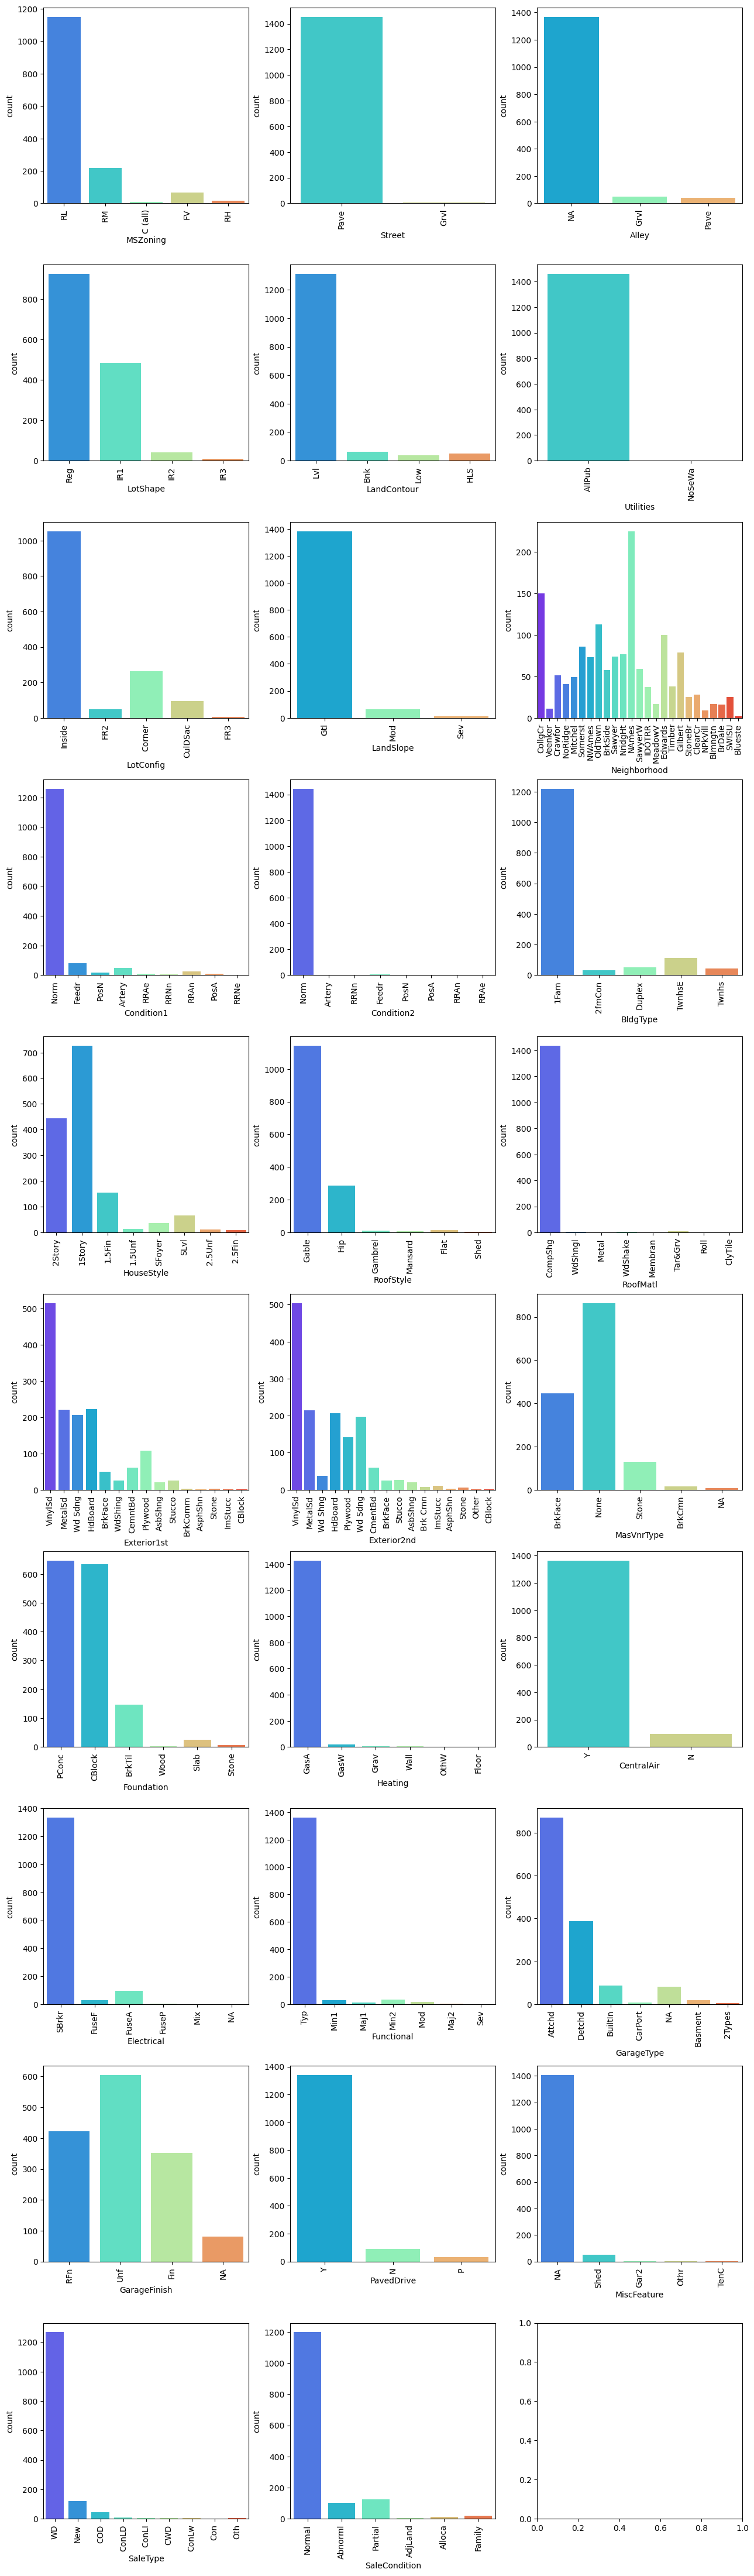

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax =plt.subplots(ncols=3,nrows=round((len(cardinal_data.columns)+1)/3), figsize=(13,44))
axes = ax.flatten()

for index,col in enumerate(cardinal_data.columns) :
    sns.countplot(x=train[col],palette='rainbow', ax = axes[index])
    plt.tight_layout(h_pad=0.5, w_pad=0.5)
    axes[index].tick_params(axis='x', rotation=90)  

<pre>Observation:
        1)there are many columns which are highly imbalanced thus we will consider dropping those as they make the model
        bias.

In [12]:
imbalanced_features = []
for i in cardinal_data.columns:
    if cardinal_data[i].value_counts().iloc[0] >1000:
        print(i, end=" : \t")
        print(cardinal_data[i].value_counts().index[0], cardinal_data[i].value_counts().iloc[0])
        imbalanced_features.append(i)

MSZoning : 	RL 1151
Street : 	Pave 1454
Alley : 	NA 1369
LandContour : 	Lvl 1311
Utilities : 	AllPub 1459
LotConfig : 	Inside 1052
LandSlope : 	Gtl 1382
Condition1 : 	Norm 1260
Condition2 : 	Norm 1445
BldgType : 	1Fam 1220
RoofStyle : 	Gable 1141
RoofMatl : 	CompShg 1434
Heating : 	GasA 1428
CentralAir : 	Y 1365
Electrical : 	SBrkr 1334
Functional : 	Typ 1360
PavedDrive : 	Y 1340
MiscFeature : 	NA 1406
SaleType : 	WD 1267
SaleCondition : 	Normal 1198


<pre>Dropping the categorical imbalanced features

In [13]:
cardinal_data.drop(columns=imbalanced_features,inplace=True)

In [14]:
cardinal_data.columns

Index(['LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish'],
      dtype='object')

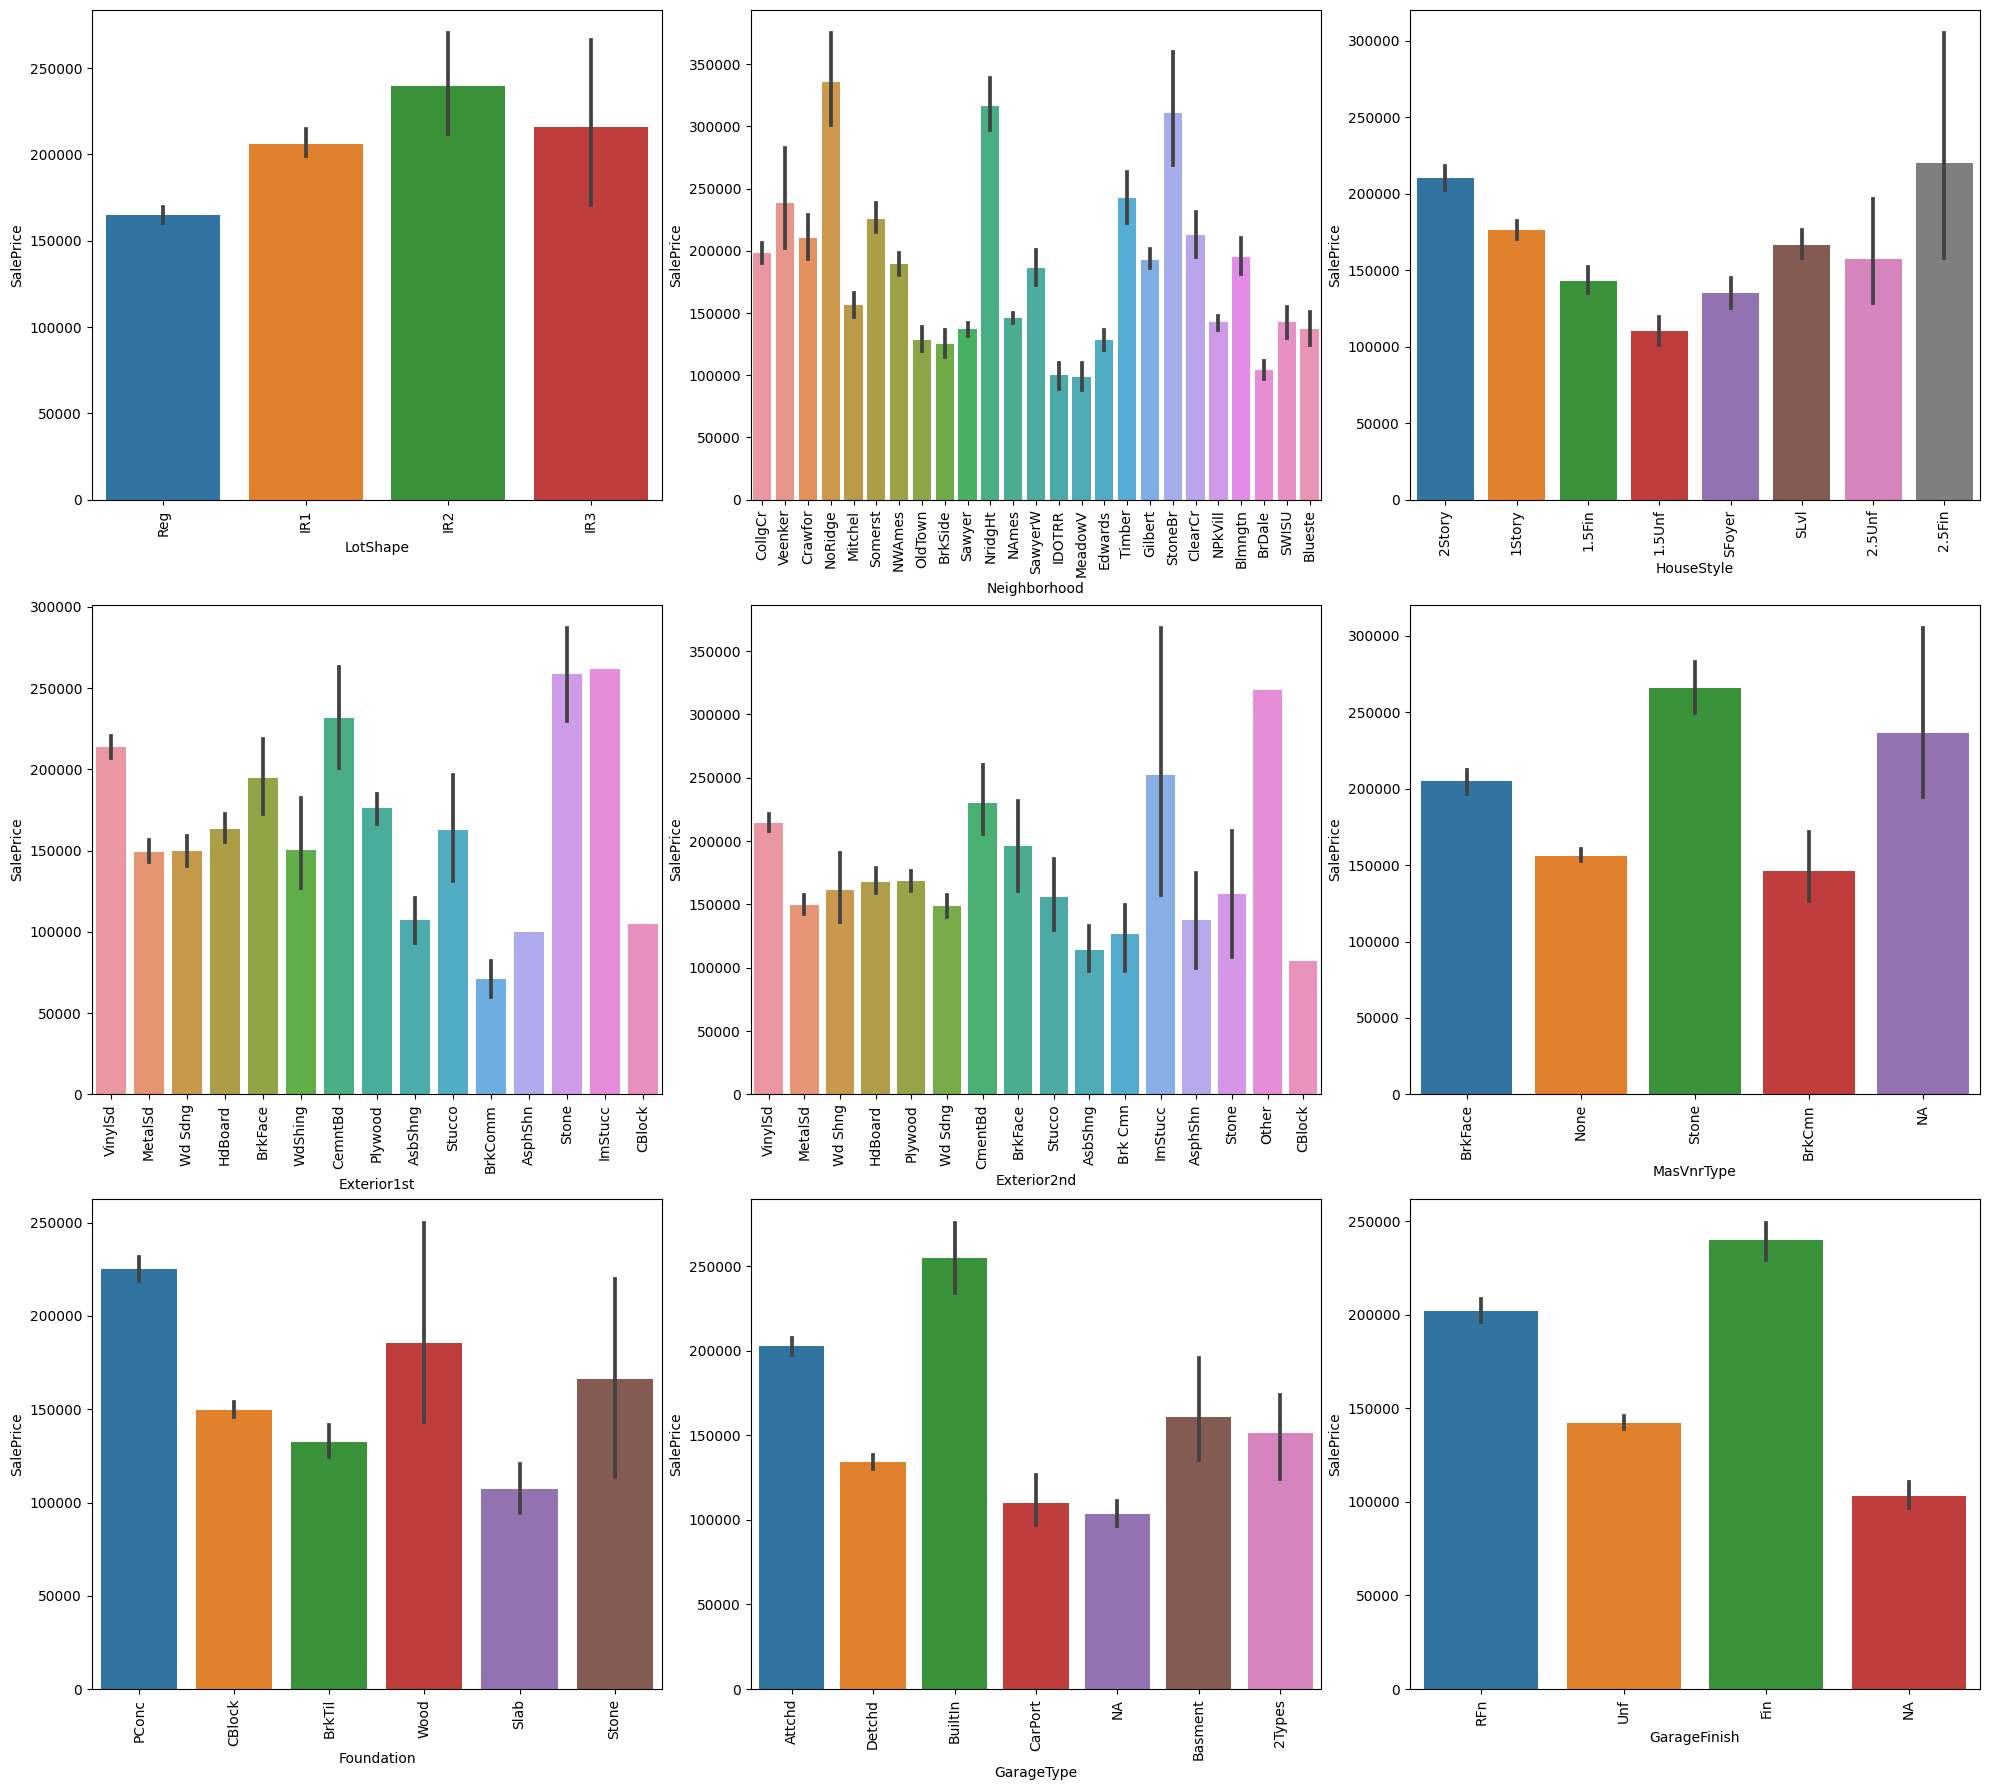

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax =plt.subplots(ncols=3,nrows=round((len(cardinal_data.columns)+1)/3), figsize=(20,18))
axes = ax.flatten()

for index,col in enumerate(cardinal_data.columns) :
    sns.barplot(x=cardinal_data[col], y=train['SalePrice'], ax=axes[index])
    plt.tight_layout(h_pad=0.5, w_pad=0.5)
    axes[index].tick_params(axis='x', rotation=90)  # Adjust rotation angle as needed

<pre><b>Observation AND As per data_description.txt: 
        1)MasVnrType - Mapping None and NA as one as its the same
        2)GarageFinish - Ordinal Mapping As the feature values share some order
        3)Also we can categorize the Neighborhood feature into three groups based on their median House price as 
        Neighborhood is an important choice of living and grouping them also shows if they have schools,medic 
        and other amenities close by.

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

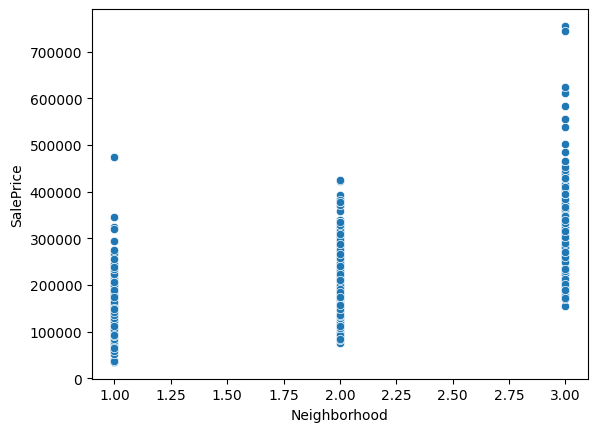

In [16]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
cardinal_data['MasVnrType'] = np.where(cardinal_data['MasVnrType'] == 'NA', 'None', cardinal_data['MasVnrType'] )
cardinal_data['GarageFinish'] = cardinal_data['GarageFinish'].map({'Fin':4,'RFn':3,'Unf':2,'NA':1})

neighborhood_dict = dict()
for i in train['Neighborhood'].unique():
    neighborhood_dict[i] = train[['Neighborhood', 'SalePrice']][train['Neighborhood'] == i].median()[0]
    
cardinal_data['Neighborhood'] = cardinal_data['Neighborhood'].map(neighborhood_dict)
cardinal_data['Neighborhood'] = np.where(cardinal_data['Neighborhood'] <=150000, 1, 
                                         np.where(cardinal_data['Neighborhood']<=250000,2,3))

sns.scatterplot(x=cardinal_data['Neighborhood'], y=train['SalePrice'])

In [17]:
encoding_data = cardinal_data.select_dtypes(include=[object]).copy()
mapped_cardinal_data = cardinal_data.select_dtypes(include=[int]).copy()

<h3>OHE using get_dummies

In [18]:
encoded_data = pd.get_dummies(encoding_data, drop_first=True)
encoded_data.head()

,LotShape_IR2,LotShape_IR3,LotShape_Reg,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [19]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for i in encoding_data.columns:
#     encoding_data[i] = le.fit_transform(encoding_data[i])

In [20]:
train_2 = train.drop(columns=cardinal_data.columns).copy()
train_2.drop(columns=imbalanced_features, inplace=True)
print(mapped_cardinal_data.shape,encoded_data.shape, train_2.shape)
new_train = pd.concat([train_2, mapped_cardinal_data, encoded_data], axis=1)
new_train.shape

(1460, 2) (1460, 53) (1460, 56)


(1460, 111)

<h3>Handling Imbalanced Data in Numeric Columns:</h3>
--Now the entire data is Numeric

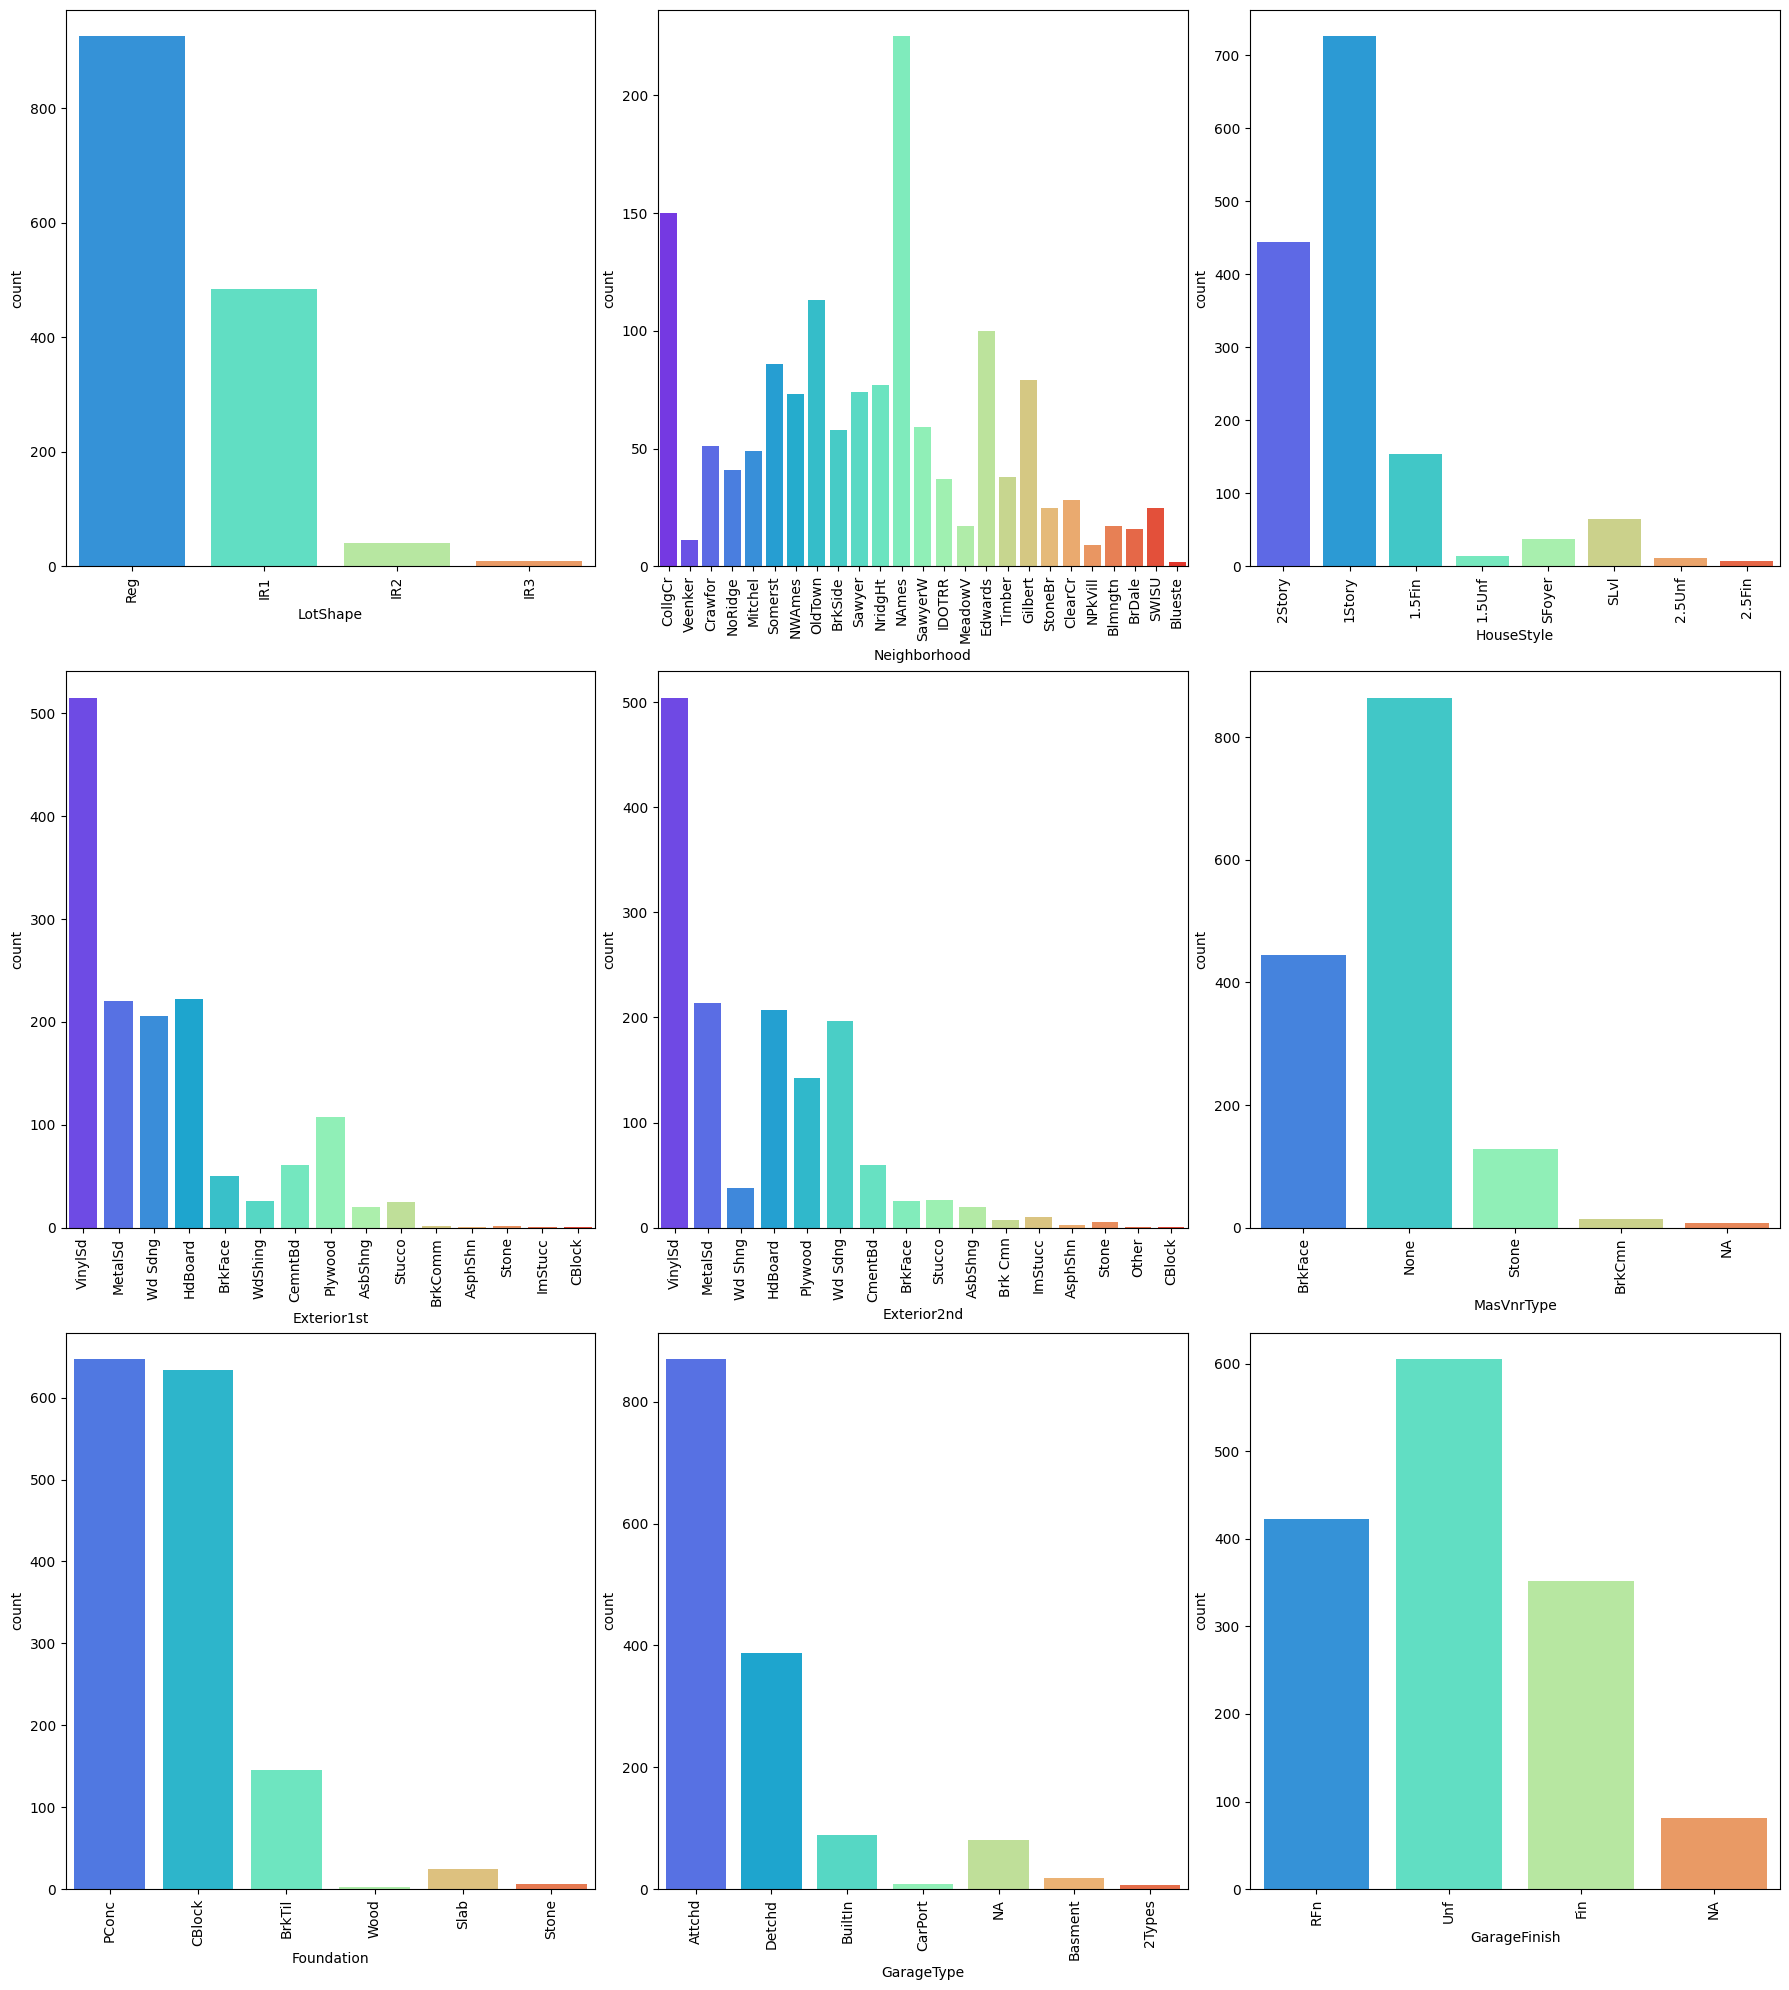

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

discrete_numeric_cols = []
for col in new_train.columns :
    if len(new_train[col].unique())<10:
        discrete_numeric_cols.append(col)
        
fig, ax =plt.subplots(ncols=3,nrows=round((len(cardinal_data.columns)+1)/3), figsize=(18,20))
axes = ax.flatten()

for index,col in enumerate(cardinal_data.columns) :
    sns.countplot(x=train[col],palette='rainbow', ax = axes[index])
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.tight_layout(h_pad=0.5, w_pad=0.5)
    axes[index].tick_params(axis='x', rotation=90)  # Adjust rotation angle as needed

In [22]:
imbalanced_features = []
for i in discrete_numeric_cols:
    if new_train[i].value_counts().iloc[0] >1000:
        print(i, end=" : \t")
        print(new_train[i].value_counts().index[0], new_train[i].value_counts().iloc[0])
        imbalanced_features.append(i)

ExterCond : 	4 1282
BsmtCond : 	4 1311
BsmtFinType2 : 	2 1256
BsmtHalfBath : 	0 1378
KitchenAbvGr : 	1 1392
GarageQual : 	4 1311
GarageCond : 	4 1326
PoolArea : 	0 1453
PoolQC : 	1 1453
Fence : 	1 1179
LotShape_IR2 : 	0 1419
LotShape_IR3 : 	0 1450
HouseStyle_1.5Unf : 	0 1446
HouseStyle_2.5Fin : 	0 1452
HouseStyle_2.5Unf : 	0 1449
HouseStyle_2Story : 	0 1015
HouseStyle_SFoyer : 	0 1423
HouseStyle_SLvl : 	0 1395
Exterior1st_AsphShn : 	0 1459
Exterior1st_BrkComm : 	0 1458
Exterior1st_BrkFace : 	0 1410
Exterior1st_CBlock : 	0 1459
Exterior1st_CemntBd : 	0 1399
Exterior1st_HdBoard : 	0 1238
Exterior1st_ImStucc : 	0 1459
Exterior1st_MetalSd : 	0 1240
Exterior1st_Plywood : 	0 1352
Exterior1st_Stone : 	0 1458
Exterior1st_Stucco : 	0 1435
Exterior1st_Wd Sdng : 	0 1254
Exterior1st_WdShing : 	0 1434
Exterior2nd_AsphShn : 	0 1457
Exterior2nd_Brk Cmn : 	0 1453
Exterior2nd_BrkFace : 	0 1435
Exterior2nd_CBlock : 	0 1459
Exterior2nd_CmentBd : 	0 1400
Exterior2nd_HdBoard : 	0 1253
Exterior2nd_ImStucc :

<pre> Dropping the numeric imbalanced features

In [23]:
new_train.drop(columns=imbalanced_features,inplace=True)
new_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,Neighborhood,GarageFinish,LotShape_Reg,HouseStyle_1Story,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_None,Foundation_CBlock,Foundation_PConc,GarageType_Attchd
0,60,65.0,8450,7,5,2003,2003,196.0,5,5,...,2,3,1,0,1,1,0,0,1,1
1,20,80.0,9600,6,8,1976,1976,0.0,4,5,...,2,3,1,1,0,0,1,1,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,5,5,...,2,3,0,0,1,1,0,0,1,1
3,70,60.0,9550,7,5,1915,1970,0.0,4,4,...,2,2,0,0,0,0,1,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,5,5,...,3,3,0,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,4,5,...,2,3,1,0,1,1,1,0,1,1
1456,20,85.0,13175,6,6,1978,1988,119.0,4,5,...,2,2,1,1,0,0,0,1,0,1
1457,70,66.0,9042,7,9,1941,2006,0.0,6,4,...,2,3,1,0,0,0,1,0,0,1
1458,20,68.0,9717,5,6,1950,1996,0.0,4,4,...,1,2,1,1,0,0,1,1,0,1


In [24]:
year = []
for i in new_train.columns:
    if 'Year' in i :
        year.append(i)
        
for i in range(len(year)):
    new_train[year[i]] = pd.to_datetime(new_train[year[i]], format='%Y')

new_train[year].describe(datetime_is_numeric=True)

,YearBuilt,YearRemodAdd
count,1460,1460
mean,1971-04-08 22:46:01.643835616,1984-11-12 14:16:06.575342464
min,1872-01-01 00:00:00,1950-01-01 00:00:00
25%,1954-01-01 00:00:00,1967-01-01 00:00:00
50%,1973-01-01 00:00:00,1994-01-01 00:00:00
75%,2000-01-01 00:00:00,2004-01-01 00:00:00
max,2010-01-01 00:00:00,2010-01-01 00:00:00


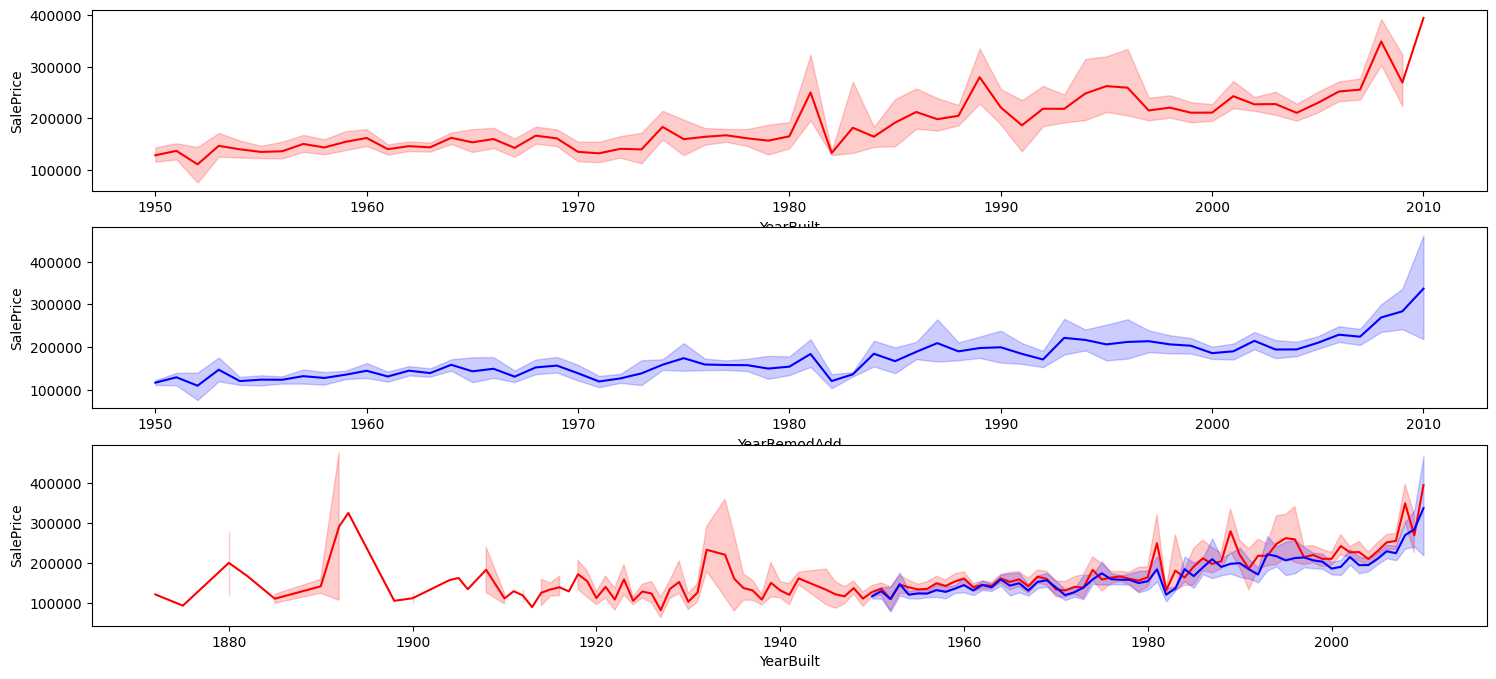

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(18,8))
axes = ax.flatten()
colors=['red', 'blue']
for i in range(4):
    if i < 2:
        filtered_data = new_train[new_train[year[i]] > '1949']  # Use '1950-01-01' for January 1st, 1950
        sns.lineplot(x=filtered_data[year[i]], y=filtered_data['SalePrice'], ax=axes[i], color=colors[i])
    elif i < 3:
        sns.lineplot(x=new_train[year[i-2]], y=new_train['SalePrice'], ax=axes[i], color=colors[i-2])
    else:
        sns.lineplot(x=new_train[year[i-2]], y=new_train['SalePrice'], ax=axes[i-1], color='blue')

<pre>Observation:
        1)All the buildings built before 1950 were Remodelled .
        2)We can see even If The YearBuilt and the Remodelled Year of another apartment is same higher value is given
        to the Built Year. Bcz Ppl moreover prefer new buildings then Reconstructed ones.
        3)Third shows us that Year Remodelled does not overlap the YearBuilt SalePrice which also tells us the YearBuilt
        has a higher value.
        4)We cannot drop any of them because Both of them independently bring value to the Target.
        

In [26]:
#Since we cannot store Timestamp format data for predicting converting .datetime to integer columns
for i in year:
    new_train[i] = new_train[i].dt.year

<h2><center><font color=blue>Outlier Handling

In [27]:
continous_features = []
for i in new_train.columns:
    if i not in discrete_numeric_cols:
        continous_features.append(i)
        
continous_features.remove('SalePrice')
new_train[continous_features]

from scipy.stats import normaltest
p_values = new_train[continous_features].apply(lambda col: normaltest(col)[1])
gaussian_cols = p_values[p_values > 0.05].index.tolist()
non_gaussian_cols = p_values[p_values <= 0.05].index.tolist()
print("Gaussian Columns:", gaussian_cols)
print("Non-Gaussian Columns:", non_gaussian_cols)

Gaussian Columns: []
Non-Gaussian Columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'cond*qual', 'home_age_when_sold', 'garage_age_when_sold', 'TotalSF', 'total_porch_area']


<pre>As the Data contains Only Skewed features(Non-guassian), Hence we will consider IQR range for handling features.

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def Outlier_counter(outlier, data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*3
    upper_bound = q3+IQR*3
    outliers = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])
    globals() [outlier] = outliers

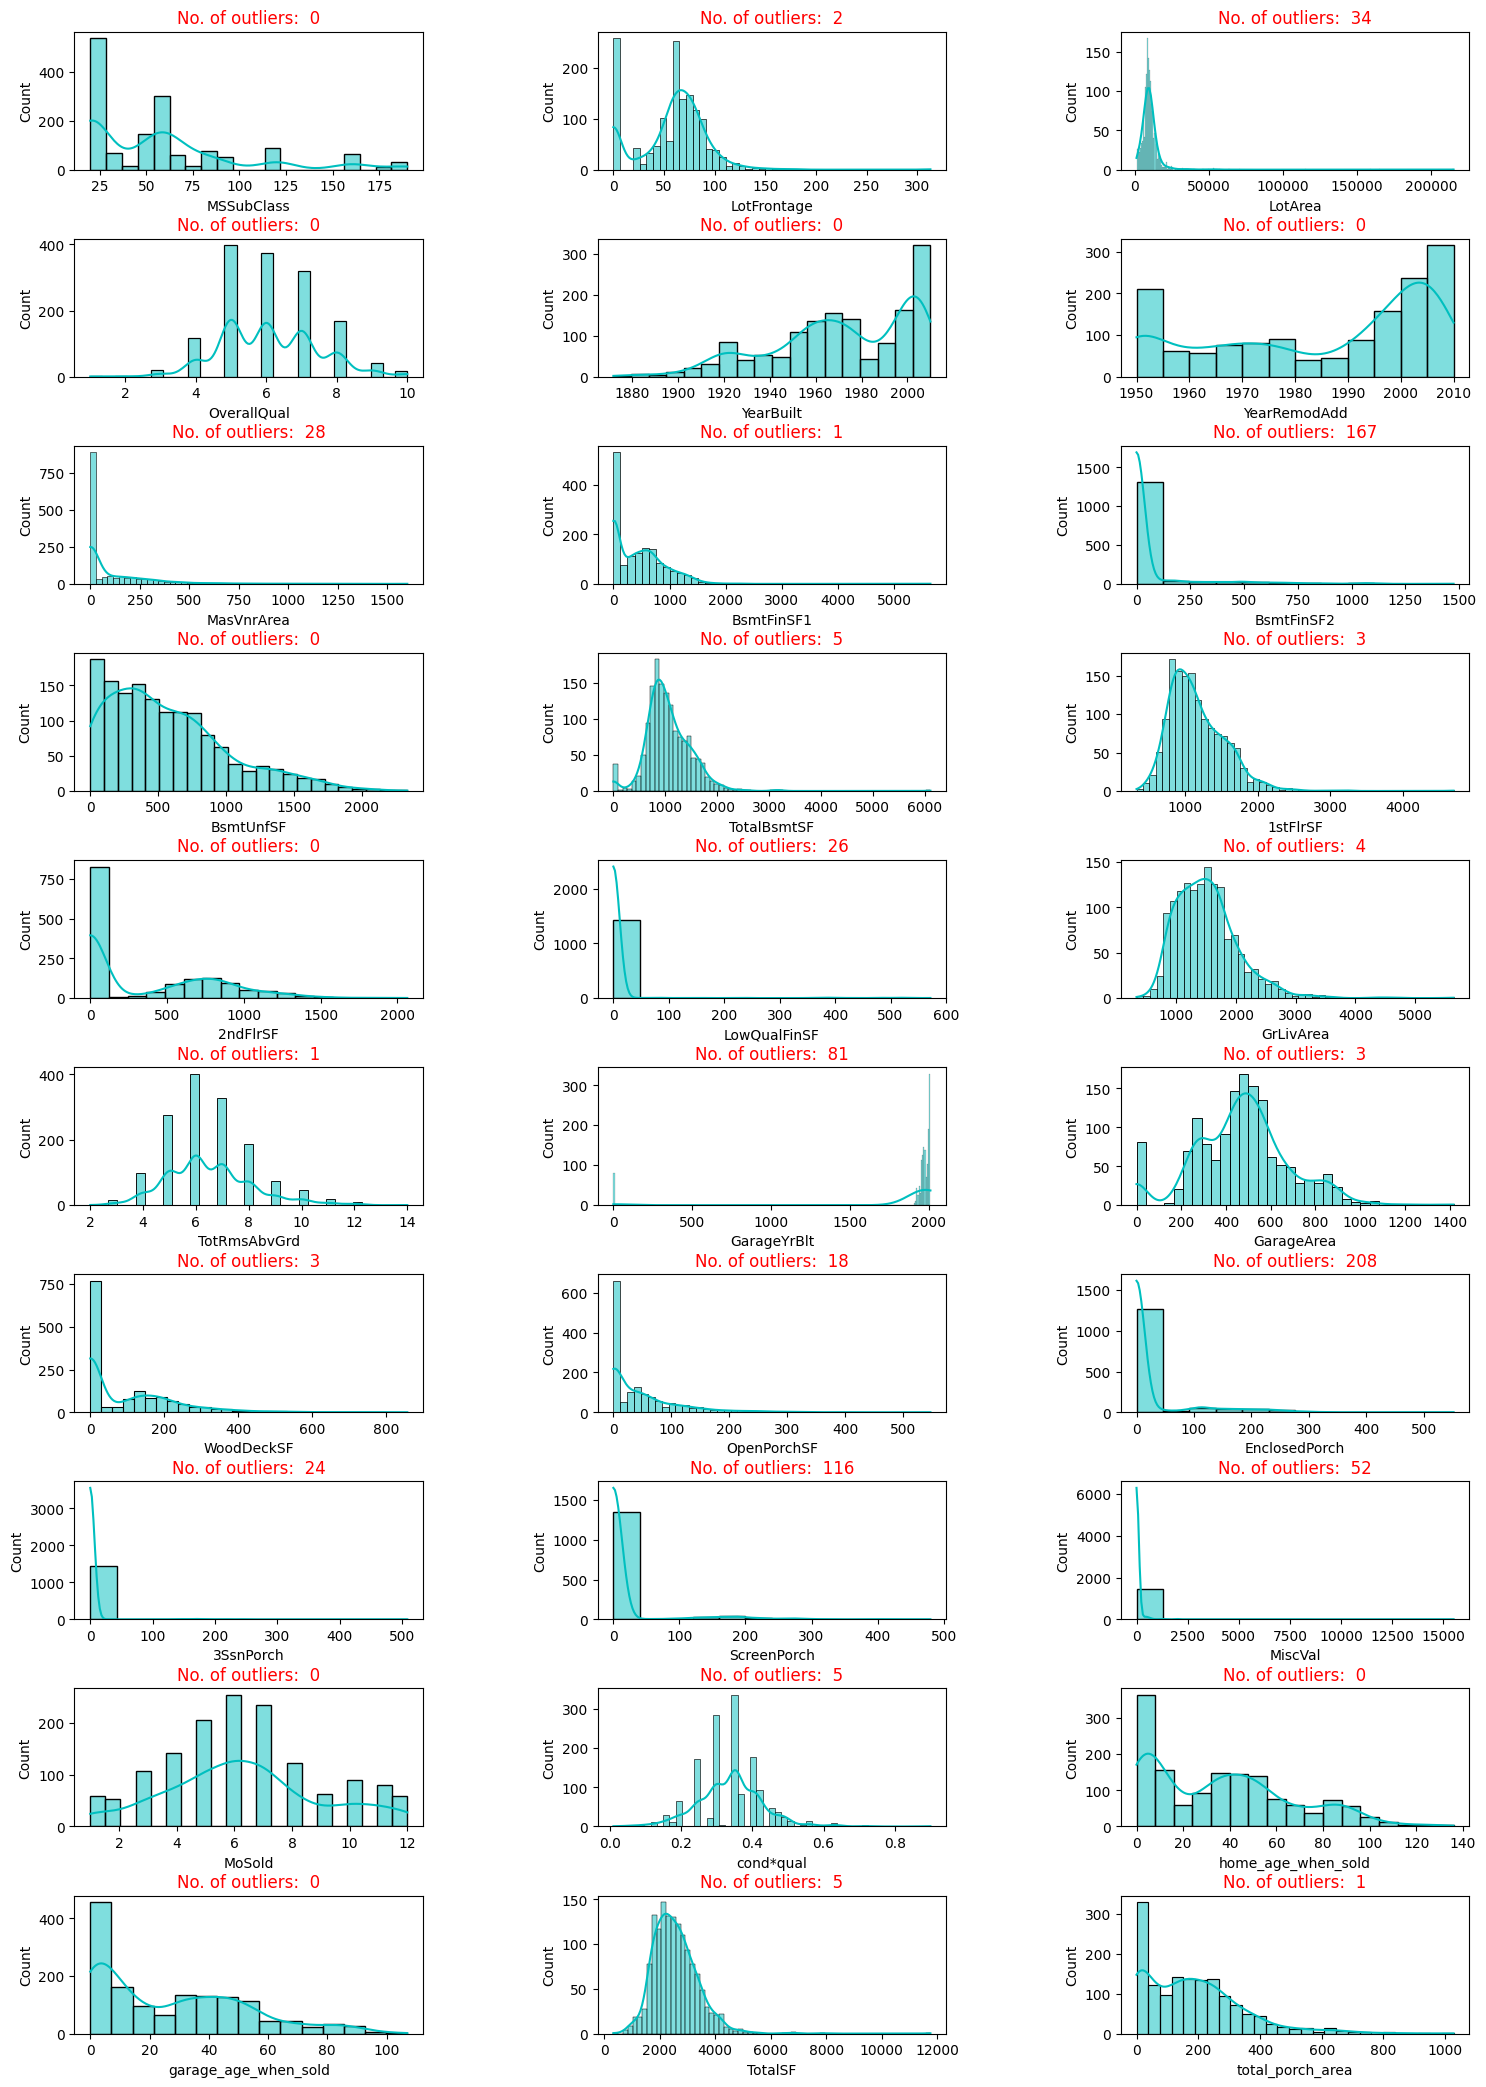

In [29]:
fig, ax = plt.subplots(ncols=3, nrows=(len(continous_features)+1)//3, figsize=(18,26))
axes = ax.flatten()
try:
    for i in range(len(continous_features)):  # Go through all the continuous columns
        sns.histplot(x=new_train[continous_features[i]], ax=axes[i], color='c', kde=True)
        Outlier_counter('outlier', new_train, continous_features[i])
        title = f'No. of outliers:  {outlier}'
        axes[i].set_title(title, color='r')
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.savefig('Outlier_plot.png')
    plt.show()
except IndexError:
    pass

<pre>We will modify the formula a bit so that we dont loose the originality and there is marginal changes in the data which does not restrict the models to stay in a particular range

In [30]:
def Outlier_trimmer(data_name, data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*3
    upper_bound = q3+IQR*3
    data = data[(data[col] > lower_bound) & (data[col] < upper_bound)]
    globals() [data_name] = data

In [31]:
def Outlier_capper(data_name, data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*3
    upper_bound = q3+IQR*3
    data[col] = np.where(data[col] < lower_bound, data[col].min(), data[col])
    data[col] = np.where(data[col] > upper_bound, data[col].max(), data[col])
    globals() [data_name] = data

In [32]:
for i in range(len(continous_features)):
    Outlier_counter('ol', new_train, continous_features[i])
    if ol >0 and ol <= 20 :
        print('Applying Outlier_trimmer as Outlier count = ', ol)
        Outlier_trimmer('new_train', new_train.copy(), continous_features[i])
        print(new_train.shape)
    elif ol > 20:
        print('Applying Outlier_capper as Outlier count = ', ol)
        Outlier_capper('new_train', new_train.copy(), continous_features[i])
        print(new_train.shape)
    else:
        print('No outliers ')

No outliers 
Applying Outlier_trimmer as Outlier count =  2
(1458, 56)
Applying Outlier_capper as Outlier count =  32
(1458, 56)
No outliers 
No outliers 
No outliers 
Applying Outlier_capper as Outlier count =  27
(1458, 56)
No outliers 
Applying Outlier_capper as Outlier count =  167
(1458, 56)
No outliers 
Applying Outlier_trimmer as Outlier count =  4
(1454, 56)
Applying Outlier_trimmer as Outlier count =  1
(1453, 56)
No outliers 
Applying Outlier_capper as Outlier count =  26
(1453, 56)
Applying Outlier_trimmer as Outlier count =  2
(1451, 56)
Applying Outlier_trimmer as Outlier count =  1
(1450, 56)
Applying Outlier_capper as Outlier count =  80
(1450, 56)
Applying Outlier_trimmer as Outlier count =  2
(1448, 56)
Applying Outlier_trimmer as Outlier count =  3
(1445, 56)
Applying Outlier_trimmer as Outlier count =  18
(1427, 56)
Applying Outlier_capper as Outlier count =  203
(1427, 56)
Applying Outlier_capper as Outlier count =  24
(1427, 56)
Applying Outlier_capper as Outlier c

In [33]:
new_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,Neighborhood,GarageFinish,LotShape_Reg,HouseStyle_1Story,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_None,Foundation_CBlock,Foundation_PConc,GarageType_Attchd
0,60,65.0,8450,7,5,2003,2003,196.0,5,5,...,2,3,1,0,1,1,0,0,1,1
1,20,80.0,9600,6,8,1976,1976,0.0,4,5,...,2,3,1,1,0,0,1,1,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,5,5,...,2,3,0,0,1,1,0,0,1,1
3,70,60.0,9550,7,5,1915,1970,0.0,4,4,...,2,2,0,0,0,0,1,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,5,5,...,3,3,0,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,2004,2005,0.0,5,5,...,2,3,1,1,1,1,1,0,1,1
1455,60,62.0,7917,6,5,1999,2000,0.0,4,5,...,2,3,1,0,1,1,1,0,1,1
1456,20,85.0,13175,6,6,1978,1988,119.0,4,5,...,2,2,1,1,0,0,0,1,0,1
1457,70,66.0,9042,7,9,1941,2006,0.0,6,4,...,2,3,1,0,0,0,1,0,0,1


In [34]:
print('Total columns : ', len(new_train.columns))
print('Categoic columns : ',len(new_train.select_dtypes(include=['object']).columns))
print('Numeric columns : ',len(new_train.select_dtypes(include=['int32', 'int64', 'float64', 'float32']).columns))

Total columns :  56
Categoic columns :  0
Numeric columns :  48


<h3>Dropping Columns causing Multicollinearity</h3>
    --didnt work in favour

In [35]:
import pandas as pd
columns_of_interest = new_train.drop(columns=['SalePrice'], axis=1).columns

correlation_matrix = new_train[columns_of_interest].corr()

threshold = 0.75
highly_correlated_pairs = []

for i in range(len(columns_of_interest)):
    for j in range(i + 1, len(columns_of_interest)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((columns_of_interest[i], columns_of_interest[j]))

new_s = set()
print("Pairs of columns with high correlation:")
for col1, col2 in highly_correlated_pairs:
    print(f"{col1} and {col2}: {correlation_matrix.loc[col1, col2]}")
    new_s.add(col1)
#     new_s.add(col2)    

Pairs of columns with high correlation:
YearBuilt and home_age_when_sold: -0.9990094811242183
TotalBsmtSF and 1stFlrSF: 0.8057200716101205
TotalBsmtSF and TotalSF: 0.8035614582231151
1stFlrSF and TotalSF: 0.7715548731394323
2ndFlrSF and HouseStyle_1Story: -0.7916885249540092
GrLivArea and TotRmsAbvGrd: 0.8267935215654223
GrLivArea and TotalSF: 0.8599777884543031
Fireplaces and FireplaceQu: 0.8675591270295991
GarageCars and GarageArea: 0.8883590471481223
WoodDeckSF and total_porch_area: 0.7651909740841253
Exterior1st_VinylSd and Exterior2nd_VinylSd: 0.9770682470573333
Foundation_CBlock and Foundation_PConc: -0.783169257595778


In [36]:
new_train2 = new_train.copy()
new_train2.drop(columns=new_s, inplace=True)

<h3>Grouping Columns with more than 30% pos or neg corr.

In [37]:
class_rel_cols=[]
for j,k in zip(new_train2.corr()['SalePrice'],new_train2.columns):
    if j > 0.15 or j <-0.15:
        class_rel_cols.append(k)

np.array(class_rel_cols)

array(['LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'FireplaceQu', 'GarageYrBlt',
       'GarageArea', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice',
       'cond*qual', 'home_age_when_sold', 'garage_age_when_sold',
       'TotalSF', 'total_porch_area', 'Neighborhood', 'GarageFinish',
       'LotShape_Reg', 'Exterior2nd_VinylSd', 'MasVnrType_None',
       'Foundation_PConc', 'GarageType_Attchd'], dtype='<U20')

In [38]:
X = new_train2.drop(['SalePrice'], axis=1).values
y= new_train2['SalePrice'].values

<h1><center><font color=red>Building, Training and Evaluating Model

In [39]:
from colorama import Fore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor, XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

scaler = StandardScaler()

# tried all of these models and kept only the best ones
l_reg = LinearRegression()
ridge = Ridge()
gb = GradientBoostingRegressor()
elastic_net = ElasticNet()
rforest = RandomForestRegressor()
xgb = XGBRegressor()
xgbrf = XGBRFRegressor()

kfold = KFold(n_splits=5, shuffle=True, random_state=32)
models = [gb,rforest, xgb]  
model_names = [ 'GradientBoosting','RandomForest', 'XGBoost']  
best_indices_dict = {}

for i, model in enumerate(models):
    model_name = model_names[i]

    best_accuracy = 0.0
    print('---------------------------', model_name, '------------------------------')
    mean_val_acc, mean_test_acc = [], []

    for train_indices, test_indices in kfold.split(X):
        X_train, X_val, y_train, y_val = train_test_split(X[train_indices], y[train_indices], test_size=0.2, random_state=42)
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        model.fit(X_train, y_train)

        y_val_pred = model.predict(X_val)

        val_accuracy = round(r2_score(y_val, y_val_pred), 4)
        mean_val_acc.append(val_accuracy)

        X_test, y_test = X[test_indices], y[test_indices]
        X_test = scaler.transform(X_test)
        y_test_pred = model.predict(X_test)
        test_accuracy = round(r2_score(y_test, y_test_pred), 4)
        mean_test_acc.append(test_accuracy)
        mae = mean_absolute_error(y_test, y_test_pred)
        print("MAE:", mae, end="\t ")
        mse = mean_squared_error(y_test, y_test_pred)

        if val_accuracy > test_accuracy:
            print(f'{Fore.GREEN}Validation r2score : :', round(val_accuracy, 4), end=f"{Fore.RESET}\t")
            print(f'{Fore.RED}Test r2score : :', round(test_accuracy, 4), f"{Fore.RESET}")
        else:
            print(f'{Fore.RED}Validation r2score : :', round(val_accuracy, 4), end=f"{Fore.RESET}\t")
            print(f'{Fore.GREEN}Test r2score : :', round(test_accuracy, 4), f"{Fore.RESET}")

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_indices_dict[model_name] = {
                'train': train_indices,
                'test': test_indices,
                'test_true': y_test,
                'test_preds': y_test_pred
            }

    print('Mean Val r2score : ', round(np.mean(mean_val_acc), 4), 'Mean Test r2score : ', round(np.mean(mean_test_acc), 4))

--------------------------- GradientBoosting ------------------------------
MAE: 15938.00972136318	 Validation r2score : : 0.9269	Test r2score : : 0.891 
MAE: 14795.137571322575	 Validation r2score : : 0.9011	Test r2score : : 0.9174 
MAE: 15595.40778148686	 Validation r2score : : 0.8858	Test r2score : : 0.9115 
MAE: 16004.764597689142	 Validation r2score : : 0.9214	Test r2score : : 0.8844 
MAE: 14406.74590143216	 Validation r2score : : 0.8853	Test r2score : : 0.9201 
Mean Val r2score :  0.9041 Mean Test r2score :  0.9049
--------------------------- RandomForest ------------------------------
MAE: 15958.05754385965	 Validation r2score : : 0.9172	Test r2score : : 0.8832 
MAE: 15055.675368421054	 Validation r2score : : 0.9005	Test r2score : : 0.9114 
MAE: 15703.154140350876	 Validation r2score : : 0.8737	Test r2score : : 0.9041 
MAE: 15983.564894366196	 Validation r2score : : 0.9231	Test r2score : : 0.8806 
MAE: 15607.85584507042	 Validation r2score : : 0.8856	Test r2score : : 0.8982 
Mea

<pre>In Gradient Boosting the MAE is $14,000 to $16,600 which could be considered reasonable, especially given the 
variation and scale of the target variable. Additionally, the R-squared (R2) scores (0.88 to 0.93) indicate a good 
fit for the data.

All the models are performing well and Since we cant makeout which model to choose from the text we will do a quick 
visualization.For Model Selection

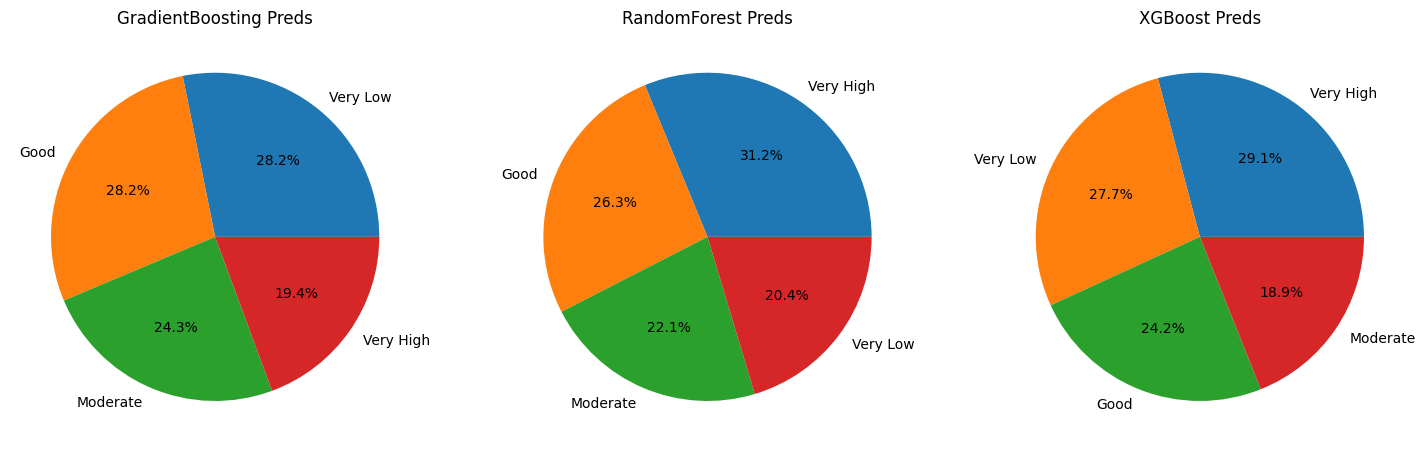

In [40]:
fig,ax= plt.subplots(ncols=3,nrows=(len(model_names)+2)//3,figsize=(18,10))
axes = ax.flatten()
for index, model_name in enumerate(model_names):
    test_preds_for_model= best_indices_dict[f'{model_name}']['test_preds']
    test_actuals_for_model= best_indices_dict[f'{model_name}']['test_true']
    
    model_report = pd.DataFrame()
    model_report['model_preds'] = test_preds_for_model
    model_report['model_true'] = test_actuals_for_model
    model_report['Range'] = np.where(
        (model_report['model_true'] + 5000 > model_report['model_preds']) & (model_report['model_preds'] > model_report['model_true'] - 5000),
        'Good',
        np.where(
            (model_report['model_true'] + 10000 > model_report['model_preds']) & (model_report['model_preds'] > model_report['model_true'] - 10000),
            'Moderate',
            np.where(model_report['model_true'] + 10000 < model_report['model_preds'],
                     'Very High','Very Low')
        )
    )
    val_c = model_report['Range'].value_counts()

    axes[index].pie(x=val_c, labels=val_c.index, autopct='%.1f%%')
    axes[index].set_title(f'{model_name} Preds')
plt.show()

<pre>So we can now determine The best model is Gradient Boosting 

<h1><center><font color=red>Building a Pipeline 

<h3>Creating Preprocessor Pipeline

In [41]:
import numpy as np
def feature_engineering(data):
    data['cond*qual'] = (data['OverallCond'] * data['OverallQual']) / 100.0
    data['home_age_when_sold'] = data['YrSold'] - data['YearBuilt']
    data['garage_age_when_sold'] = data['YrSold'] - data['GarageYrBlt']
    data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'] 
    data['total_porch_area'] = data['WoodDeckSF'] + data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch'] 
    transformed_data = data.copy()
    return transformed_data

def col_dropper(data, cols=['Id']):
    transformed_data = data.drop(columns=cols, axis=1)
    return transformed_data

def null_filler(data):
    cat_cols = data.select_dtypes(include=object).columns
    data[cat_cols] = data[cat_cols].fillna('None')
    data.fillna(0, inplace=True)
    transformed_data = data.copy()
    return transformed_data

def ordinal_mapper(data):
    ordinal_feat1 = ['GarageCond','GarageQual','FireplaceQu','KitchenQual','HeatingQC','BsmtCond','BsmtQual','PoolQC',
                 'ExterQual','ExterCond']                      
    for i in ordinal_feat1:
        data[i] = data[i].map({'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2, 'None':1})
        
    ordinal_feat2 = ['BsmtFinType1','BsmtFinType2']
    for i in ordinal_feat2:
        data[i] = data[i].map({'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'None':1})

    data['Fence'] = data['Fence'].map({'GdPrv':5, 'MnPrv':4, 'GdWo':3, 'MnWw':2, 'None':1 })
    data['BsmtExposure'] = data['BsmtExposure'].map({'Gd':5,'Av':4,'Mn':3,'No':2,'None':1})
    data['GarageFinish'] = data['GarageFinish'].map({'Fin':4,'RFn':3,'Unf':2,'None':1})
#as the test data does not have SalePrice Column we will have to hardcode their values
    neighborhood_dict = {'CollgCr': 197200.0,'Veenker': 218000.0,'Crawfor': 200624.0,'NoRidge': 301500.0,'Mitchel': 153500.0,
                        'Somerst': 225500.0,'NWAmes': 182900.0,'OldTown': 119000.0,'BrkSide': 124300.0,'Sawyer': 135000.0,
                        'NridgHt': 315000.0,'NAmes': 140000.0,'SawyerW': 179900.0,'IDOTRR': 103000.0,'MeadowV': 88000.0,
                        'Edwards': 121750.0,'Timber': 228475.0,'Gilbert': 181000.0,'StoneBr': 278000.0,'ClearCr': 200250.0,
                        'NPkVill': 146000.0,'Blmngtn': 191000.0,'BrDale': 106000.0,'SWISU': 139500.0,'Blueste': 137500.0}
    data['Neighborhood'] = data['Neighborhood'].map(neighborhood_dict)
    data['Neighborhood'] = np.where(data['Neighborhood'] <=150000, 1, np.where(data['Neighborhood']<=250000,2,3))
    transformed_data = data.copy()
    return transformed_data

def categoric_imbalanced_features(data):
    cardinal_data = data[data.select_dtypes(include=['object']).columns].copy()
    imbalanced_features = list()
    for i in cardinal_data.columns:
        if cardinal_data[i].value_counts().iloc[0] >1000:
            imbalanced_features.append(i)
    return imbalanced_features            

def cardinal_encoder(data):
    cardinal_cols = data.select_dtypes(include=object).columns
    encoding_data = data[cardinal_cols].copy()
    encoded_data = pd.get_dummies(encoding_data, drop_first=True)
    transformed_data = pd.concat([data.drop(columns=cardinal_cols, axis=1), encoded_data], axis=1)
    return transformed_data
    
def numeric_imbalanced_features(data):
    discrete_numeric_cols = []
    for col in data.columns :
        if len(data[col].unique())<10:
            discrete_numeric_cols.append(col)
    
    imbalanced_features = []
    for i in discrete_numeric_cols:
        if data[i].value_counts().iloc[0] >1000:
            imbalanced_features.append(i)
    return imbalanced_features


class OutlierHandler:
    def __init__(self, data):
        self.data = data
    
    def _outlier_counter(self, col):
        q1 = np.percentile(self.data[col], 25)
        q3 = np.percentile(self.data[col], 75)
        IQR = q3 - q1
        lower_bound = q1 - IQR * 3
        upper_bound = q3 + IQR * 3
        outliers = len(self.data[(self.data[col] < lower_bound) | (self.data[col] > upper_bound)])
        return outliers

    def _outlier_trimmer(self, col):
        q1 = np.percentile(self.data[col], 25)
        q3 = np.percentile(self.data[col], 75)
        IQR = q3 - q1
        lower_bound = q1 - IQR * 3
        upper_bound = q3 + IQR * 3
        self.data = self.data[(self.data[col] > lower_bound) & (self.data[col] < upper_bound)]

    def _outlier_capper(self, col):
        q1 = np.percentile(self.data[col], 25)
        q3 = np.percentile(self.data[col], 75)
        IQR = q3 - q1
        lower_bound = q1 - IQR * 3
        upper_bound = q3 + IQR * 3
        self.data[col] = np.where(self.data[col] < lower_bound, self.data[col].min(), self.data[col])
        self.data[col] = np.where(self.data[col] > upper_bound, self.data[col].max(), self.data[col])

    def handle_training_outliers(self, continous_features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'cond*qual',
       'home_age_when_sold', 'garage_age_when_sold', 'TotalSF',
       'total_porch_area']):
        for col in continous_features:
            ol = self._outlier_counter(col)
            if 0 < ol < 21:
                self._outlier_trimmer(col)
            elif ol > 21:
                self._outlier_capper(col)
            else:
                pass
        return self.data

    def handle_testing_outliers(self, continous_features=None):
        if continous_features is None:
            continous_features = self.data.select_dtypes(include=['float64', 'int64']).columns
        for col in continous_features:
            ol = self._outlier_counter(col)
            if ol > 0 :
                self._outlier_capper(col)
            else:
                pass
        return self.data


def col_reducer(data, cols=['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'GarageFinish', 'LotShape', 'Neighborhood', 'Foundation',
       'GarageType']):
    transformed_data = data[cols].copy()
    return transformed_data

def preprocessor(data, mode):
    d1 = feature_engineering(data)
    d2 = col_dropper(d1)
    d3 = null_filler(d2)
    d4 = ordinal_mapper(d3)
    d5 = col_dropper(d4, (categoric_imbalanced_features(d4)))
    d6 = cardinal_encoder(d5)
    d7 = col_dropper(d6, numeric_imbalanced_features(d6))
    oh_ = OutlierHandler(d7)
    if mode=='train':
        d8 = oh_.handle_training_outliers()
    else:
        d8 = oh_.handle_testing_outliers()   
    return d8

from sklearn.base import BaseEstimator, TransformerMixin

class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, mode='train'):
        self.mode = mode
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return preprocessor(X, self.mode)

<h3>Importing data

In [42]:
import pandas as pd
pipe_train = pd.read_csv('train.csv')

<h3>Importing preprocessor

In [43]:
train_data_preprocessor = CustomPreprocessor()
test_data_preprocessor = CustomPreprocessor(mode='test')

In [44]:
import warnings
warnings.filterwarnings('ignore')
new = train_data_preprocessor.transform(pipe_train)

<h3>Train Test Split

In [45]:
train_indices_for_RForest = best_indices_dict['GradientBoosting']['train']
test_indices_for_RForest = best_indices_dict['GradientBoosting']['test']

x_train, x_val, y_train, y_val = train_test_split(new.drop(columns=['SalePrice']).values[train_indices_for_RForest],
                                                                   new['SalePrice'].values[train_indices_for_RForest],
                                                                   test_size=0.2)

<h3>Building Model Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor 
gb = GradientBoostingRegressor()
pipeline_model = Pipeline(steps=[('Standard Scaler', StandardScaler()),
                                 ('Gradient Bossting Regressor', GradientBoostingRegressor())])
pipeline_model.fit(x_train, y_train)

Pipeline(steps=[('Standard Scaler', StandardScaler()),
                ('Gradient Bossting Regressor', GradientBoostingRegressor())])

<h3>Predicting on Vaidation Data

In [47]:
predictions = pipeline_model.predict(x_val)
r2_score(predictions, y_val)

0.8628454590000754

<h3>Predicting on Test Data

In [48]:
x_test = new.drop(columns=['SalePrice']).values[test_indices_for_RForest]
y_test = new['SalePrice'].values[test_indices_for_RForest]

In [49]:
test_predictions = pipeline_model.predict(x_test)
r2_score(test_predictions, y_test)

0.9070020338811602

<h3>Saving Pipeline Preprocessor and Model

In [50]:
import joblib
joblib.dump(test_data_preprocessor, 'Test_preprocessor.pkl')
joblib.dump(train_data_preprocessor, 'Train_preprocessor.pkl')
joblib.dump(pipeline_model, 'pipeline_model.pkl')

['pipeline_model.pkl']

<h3>Importing the Pipelines

In [51]:
test_data_preprocessor = joblib.load('Test_preprocessor.pkl')
pipe_model = joblib.load('pipeline_model.pkl')

<h3>Importing Test Data

In [52]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<h3>Predicting on test data

In [53]:
transformed_data = test_data_preprocessor.transform(test)
test_preds = pipe_model.predict(transformed_data)

In [54]:
test_preds

array([129566.69812757, 151384.93335109, 185489.84970614, ...,
       206906.51663521, 121267.01204405, 229490.49356334])

<h3>Saving results in submission file

In [55]:
sub = pd.read_csv('sample_submission.csv')
sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [56]:
pre_preds = sub['SalePrice'].tolist()
sub['SalePrice'] = test_preds
sub.set_index('Id', inplace=True)
sub.to_csv('GB_predictions.csv')

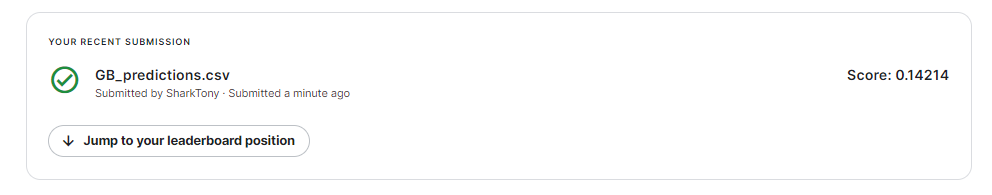

In [57]:
from IPython.display import Image, display
image_path = 'leaderboard.png'
display(Image(filename=image_path))